In [15]:
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
DG = nx.DiGraph()
DG.add_edge('ETH', 'USDT', weight=3000)
DG.add_edge('BTC', 'USDT', weight=43000)
DG.add_edge('ETH', 'BTC', weight=0.0686)

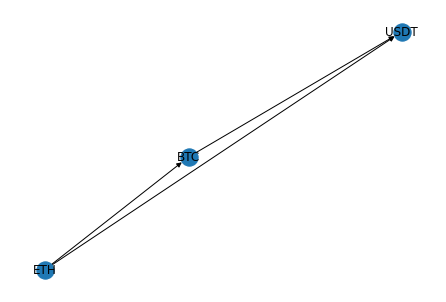

In [17]:
nx.draw(DG, with_labels=True)

In [18]:
import requests

response = requests.get('https://api.binance.com/api/v3/exchangeInfo')

data = response.json()

In [19]:
trading_symbols = [symbol for symbol in data['symbols'] if symbol['status'] == 'TRADING']

In [20]:
trading_symbols[0].keys()

dict_keys(['symbol', 'status', 'baseAsset', 'baseAssetPrecision', 'quoteAsset', 'quotePrecision', 'quoteAssetPrecision', 'baseCommissionPrecision', 'quoteCommissionPrecision', 'orderTypes', 'icebergAllowed', 'ocoAllowed', 'quoteOrderQtyMarketAllowed', 'isSpotTradingAllowed', 'isMarginTradingAllowed', 'filters', 'permissions'])

In [21]:
# import csv

# fields = ['symbol', 'status', 'baseAsset', 'baseAssetPrecision', 'quoteAsset', 'quotePrecision', 'quoteAssetPrecision', 'baseCommissionPrecision', 'quoteCommissionPrecision', 'orderTypes', 'icebergAllowed', 'ocoAllowed', 'quoteOrderQtyMarketAllowed', 'isSpotTradingAllowed', 'isMarginTradingAllowed', 'filters', 'permissions']

# with open('symbols.csv', 'w', newline='') as csv_file:
#     writer = csv.DictWriter(csv_file, fieldnames=fields)
#     writer.writeheader()
#     for symbol in data['symbols']:
#         writer.writerow(symbol)

In [22]:
G = nx.Graph()
for symbol in trading_symbols:
  G.add_edge(symbol['baseAsset'], symbol['quoteAsset'])

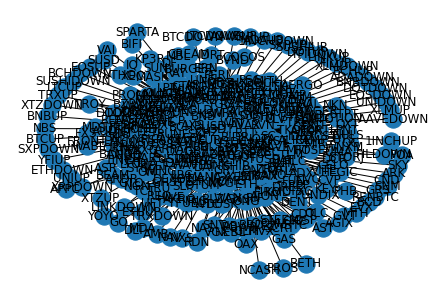

In [23]:
nx.draw(G, with_labels=True)

In [24]:
G

In [25]:
paths = nx.algorithms.simple_paths.shortest_simple_paths(G, 'WAXP', 'USDT')

In [26]:
for p in paths:
  if len(p) > 3:
    break
  print(p)

['WAXP', 'USDT']
['WAXP', 'BTC', 'USDT']
['WAXP', 'BNB', 'USDT']
['WAXP', 'BUSD', 'USDT']
